#### Definition
1. mm, s, radian, keV unless specified otherwise in the plot 
3. The coordinate convention of this simulation and its relation to XPP coordinate is 
    (axis 0, axis 1, axis 2) = (vertical, horizontal, propagation) = (xpp y, xpp x, xpp z) 

np.fft(field) = spectrum

np.ifft(spectrum) = field

# Important !!!

In [2]:
import sys

sys.path.append("../../../../XRaySimulation2")

import numpy as np
import matplotlib.pyplot as plt
from XRaySimulation import util, Pulse

import Controller

plt.rcParams.update({'font.size': 12})

## 1. Start the simulation

In [3]:
# Create a controller object as we have at XPP
x = Controller.XppController()

sase_source = Pulse.saseSource(nx=32, ny=32, nz=1024,
                               dx=4, dy=4, dz=0.1, Ec=11.0,
                               mean_pulse_energy_uJ=600,  # uJ.  10 uJ / 0.5eV * 30 eV = 600 uJ
                               pulse_energy_sigma_uJ=100,
                               # SASE energy fluctuation. Not the fluctuation after the xpp mono
                               n_gaussian=500,
                               mode_size_x=15,
                               mode_size_y=15,
                               mode_size_z=0.15 * util.c,
                               mode_center_spread_x=20,
                               mode_center_spread_y=20,
                               mode_center_spread_z=20 * util.c,
                               x0=np.array([0, -50e3, -30e6]))

Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, ro

### Define functions on the fly

In [4]:
def move_vcc_zero():
    _ = x.t2.x_umv(0)
    _ = x.t3.x_umv(0)
    
def move_vcc(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(-val)

def move_delay0(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(val)

def move_delay(val):
    _ = x.t45.delay_umvr(val)

def move_sample():
    print("Move sample tower to sample")
    print("Move sample.z")
    _ = x.sample.z_umv(11565.5671)
    print("Move sample.x")
    _ = x.sample.x_umv(22804.9636)

def move_yag():
    print("Move sample tower to yag")
    print("Move sample.z")
    _ = x.sample.z_umv(0)
    print("Move sample.x")
    _ = x.sample.x_umv(0)

def move_sample_yag():
    pass

def optimize_miniSD_alignment(gpu_flag=gpu):
    pass

def optimize_CC_VCC_overlap(gpu_flag=gpu):
    pass

### Development the auto-alignment algorithm in this cell

In [5]:
pass

### Preparation: Align the mono

Motor moved from 0.00000 to -15.88265 degree
Motor moved from 0.00000 to -15.88265 degree
Motor moved from -15.88265 to -15.88394 degree
Motor moved from -15.88265 to -15.88415 degree


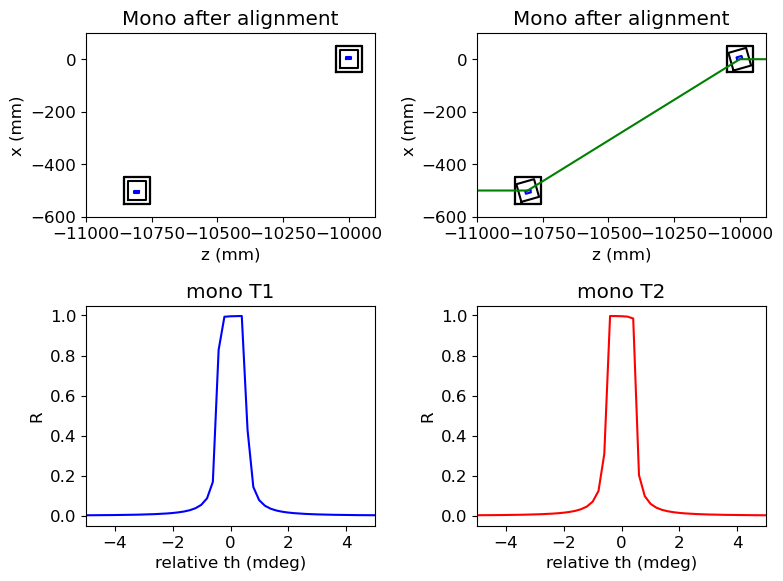

In [6]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(6)
fig.set_figwidth(8)

# show mono before alignment
x.plot_mono_optics(ax=ax[0, 0],  xlim=([-11000, -9900]))

# show mono after alignment
_ = x.align_xpp_mono()
x.plot_mono_optics(ax=ax[0, 1], xlim=([-11000, -9900]), show_trajectory=True)
x.plot_mono_rocking(ax_mono_t1=ax[1, 0], ax_mono_t2=ax[1, 1])

plt.tight_layout()
plt.show()

### Preparation: Align the miniSD

Motor moved from 0.00000 to 17.06809 degree
Motor moved from 0.00000 to 17.06809 degree
Motor moved from 0.00000 to 17.06809 degree
Motor moved from 0.00000 to 17.06809 degree
Motor moved from 0.00000 to 17.06809 degree
Motor moved from 0.00000 to 17.06809 degree
Motor moved from 17.06809 to 17.07516 degree
Motor moved from 17.06809 to 17.06257 degree
Motor moved from 17.06809 to 17.06206 degree
Motor moved from 17.06809 to 17.07642 degree
Motor moved from 17.06809 to 17.07628 degree
Motor moved from 17.06809 to 17.06206 degree


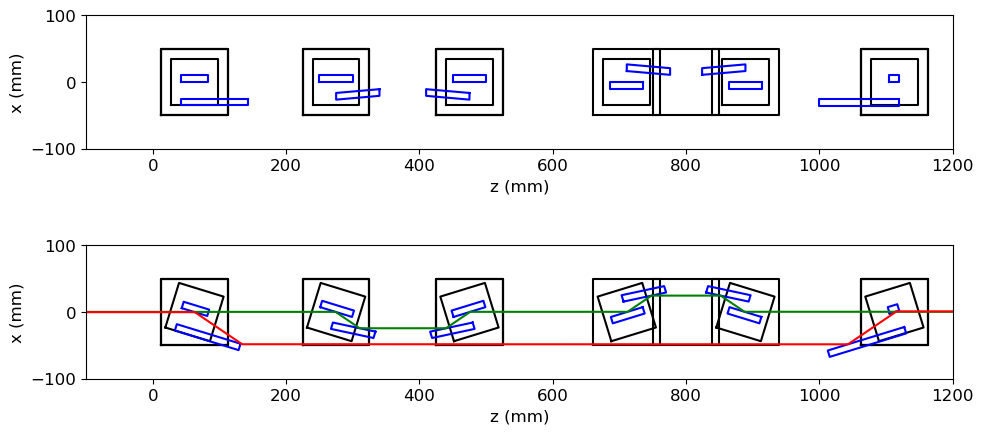

In [7]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

#     Before alignment
x.plot_miniSD_table(ax=ax[0], xlim=None, ylim=None, show_trajectory=False)

#     After alignment
_ = x.align_miniSD()
x.plot_miniSD_table(ax=ax[1], xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Get the most updated rocking curve around current location.


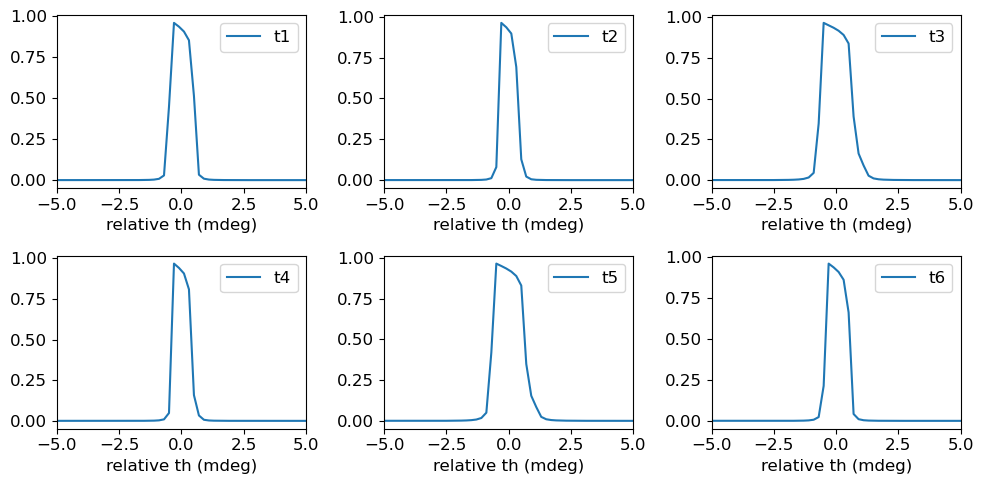

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

x.plot_miniSD_rocking(ax_list=np.reshape(ax, 6))

plt.tight_layout()
plt.show()

### Align the horizontal position of the probe beam with the CC beam

In [9]:
x.t2.x_umv(-996.2961560033352 + 3000)
x.t3.x_umv(996.2961560033352 + 3000)

Motor moved from 0.0000 um to to 2003.7038 um
Motor moved from 0.0000 um to to 3996.2962 um


4196296156003.335

In [10]:
# get current position of the beams on the yag
beam_pos_cc = x.get_raytracing_trajectory(path="cc")
beam_pos_cc = beam_pos_cc[0][-1]

beam_pos_vcc = x.get_raytracing_trajectory(path="vcc")
beam_pos_vcc = beam_pos_vcc[0][-1]

print("The different between probe beam and cc on the yag is")
print(beam_pos_cc - beam_pos_vcc)

# Walk the motors a little bit
move_vcc(100)

# get current position of the beams on the yag
beam_pos_vcc2 = x.get_raytracing_trajectory(path="vcc")
beam_pos_vcc2 = beam_pos_vcc2[0][-1]
print("The different between probe beam and cc on the yag is")
print(beam_pos_vcc2 - beam_pos_vcc)

# get the dependence on the beam position and the motion of vcc motors
change = beam_pos_vcc2 - beam_pos_vcc
print("The relative beam positions between the probe and cc beam changes")
print(change)
print("by changing the t2x and t3x by 100 um")

delta = (beam_pos_cc - beam_pos_vcc2)[1] / change[1] * 100

print("The current total difference is", change)
print("Needs to move {}um to elimiate the horizontal difference".format(delta))

move_vcc(delta)

beam_pos_vcc3 = x.get_raytracing_trajectory(path="vcc")
beam_pos_vcc3 = beam_pos_vcc3[0][-1]
print("After adjusting, the different between probe beam and cc on the yag is")
print(beam_pos_cc - beam_pos_vcc3)

The different between probe beam and cc on the yag is
[   0.         1496.27411849    0.        ]
Motor moved from 2003.7038 um to to 2103.7038 um
Motor moved from 3996.2962 um to to 3896.2962 um
The different between probe beam and cc on the yag is
[  0.         159.28854852   0.        ]
The relative beam positions between the probe and cc beam changes
[  0.         159.28854852   0.        ]
by changing the t2x and t3x by 100 um
The current total difference is [  0.         159.28854852   0.        ]
Needs to move 839.3482032663901um to elimiate the horizontal difference
Motor moved from 2103.7038 um to to 2943.0520 um
Motor moved from 3896.2962 um to to 3056.9480 um
After adjusting, the different between probe beam and cc on the yag is
[ 0.         -0.46106066  0.        ]


### Align the miniSD location for time 0

In [11]:
print(x.t2.x.user_getPosition())
print(x.t3.x.user_getPosition())

2943.0520472630546
3056.9479527369454


Motor moved from 0.0000 um to to -5000.0000 um
Motor moved from 2943.0520 um to to 2940.7458 um
Motor moved from 3056.9480 um to to 3059.2542 um
6854.536571042319


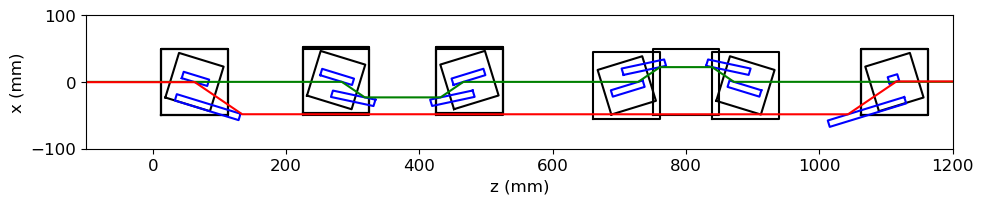

In [12]:
x.t45.delay_umv(-5000)
x.t2.x_umv(2940.7457634603634)
x.t3.x_umv(3059.2542365396366)

pathLenght_cc = x.get_raytracing_trajectory(path="cc")[-1]
pathLenght_vcc = x.get_raytracing_trajectory(path="vcc")[-1]
print((pathLenght_cc - pathLenght_vcc) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Motor moved from -5000.0000 um to to 8000.0000 um
Motor moved from 2940.7458 um to to 2940.7458 um
Motor moved from 3059.2542 um to to 3059.2542 um
-4955.55459967858


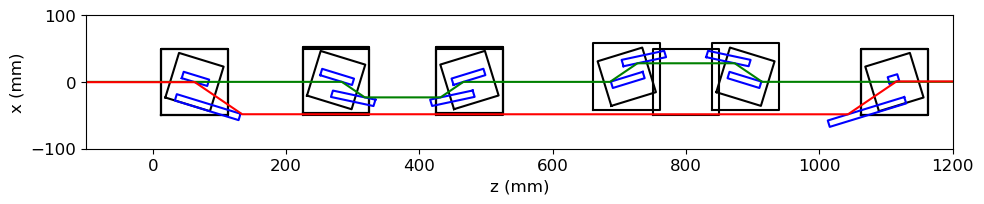

In [13]:
x.t45.delay_umv(8000)
x.t2.x_umv(2940.7457634603634)
x.t3.x_umv(3059.2542365396366)

pathLenght_cc = x.get_raytracing_trajectory(path="cc")[-1]
pathLenght_vcc = x.get_raytracing_trajectory(path="vcc")[-1]
print((pathLenght_cc - pathLenght_vcc) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

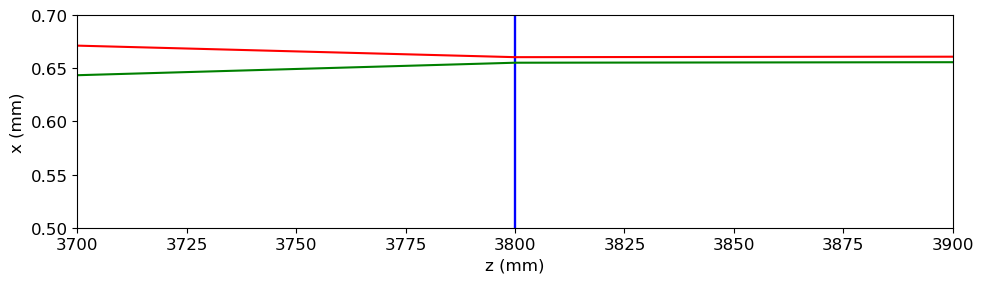

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=[3700, 3900], ylim=[0.5,0.7], show_trajectory=True)
ax.set_aspect('auto')
plt.tight_layout()
plt.show()

Motor moved from 8000.0000 um to to -5000.0000 um
Motor moved from 2940.7458 um to to 5940.7458 um
Motor moved from 3059.2542 um to to 6059.2542 um
9580.368593531928


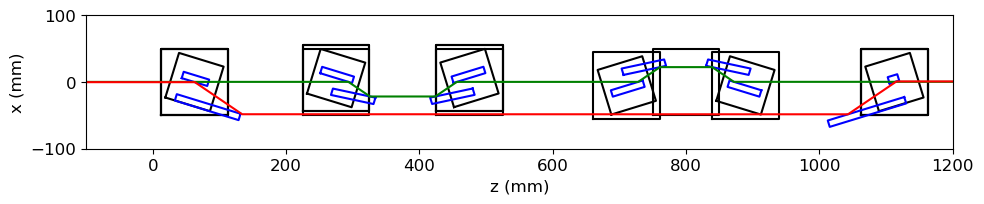

In [15]:
x.t45.delay_umv(-5000)
x.t2.x_umv(2940.7457634603634 + 3000)
x.t3.x_umv(3059.2542365396366 + 3000)

pathLenght_cc = x.get_raytracing_trajectory(path="cc")[-1]
pathLenght_vcc = x.get_raytracing_trajectory(path="vcc")[-1]
print((pathLenght_cc - pathLenght_vcc) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Motor moved from -5000.0000 um to to 8000.0000 um
Motor moved from 5940.7458 um to to 5940.7458 um
Motor moved from 6059.2542 um to to 6059.2542 um
-2229.970534076886


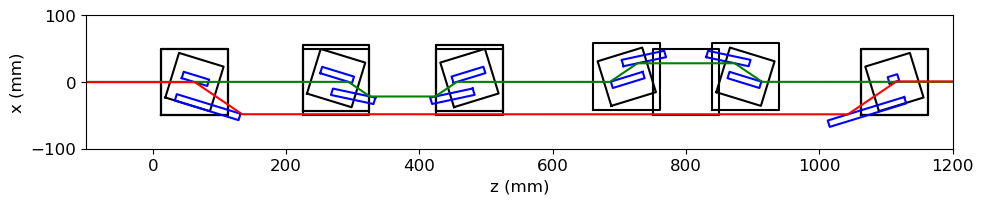

In [16]:
x.t45.delay_umv(8000)
x.t2.x_umv(2940.7457634603634 + 3000)
x.t3.x_umv(3059.2542365396366 + 3000)

pathLenght_cc = x.get_raytracing_trajectory(path="cc")[-1]
pathLenght_vcc = x.get_raytracing_trajectory(path="vcc")[-1]
print((pathLenght_cc - pathLenght_vcc) / util.c)

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

In [17]:
(2233.3832426370327 + 9576.768407146008) / 13000


0.9084732038294647

In [18]:
2.2 / 0.9 + 4

6.444444444444445